<a href="https://colab.research.google.com/github/trevorwjames/DS-Unit-1-Sprint-2-Statistics/blob/master/module%203%20/%20LS_DS_123_Confidence_Intervals_Assignment_Trevor_James.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Confidence Intervals

The following url can be used to access an abbreviated version of responses to Stack Overflow's 2018 Developer Survey. The original Survey had ~100k respondents but the data is quite dirty so I have selected a cleaner subset of it for you to use for your assignment.

<https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv>

The provided dataset holds 14 columns of information about individuals who make less than 500k per year and who responded that they had: 

"Participated in a full-time developer training program or bootcamp"

## Part 1 - Setting the Stage

**1) Load the dataset**

In [4]:
# Loading the data set and libraries
import numpy as np
import pandas as pd
from scipy import stats

bootcamps = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv')

bootcamps.head()

,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
0,62,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data scientist or machine l...,12-14 years,6-8 years,120000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;F#;Haskell;Python;Scala,Male,25 - 34 years old,White or of European descent
1,73,No,Employed full-time,"A humanities discipline (ex. literature, histo...",Back-end developer;Full-stack developer;System...,0-2 years,0-2 years,36000.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Four to six months,Java;JavaScript;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,White or of European descent
2,127,"Yes, full-time",Employed full-time,"A business discipline (ex. accounting, finance...",Full-stack developer,3-5 years,3-5 years,59980.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C#;JavaScript;TypeScript;HTML;CSS,Male,25 - 34 years old,East Asian
3,140,No,Employed full-time,"A social science (ex. anthropology, psychology...",Data scientist or machine learning specialist;...,9-11 years,3-5 years,70000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Tapping ...,I haven’t gotten a developer job,JavaScript;Python;SQL;VBA,Male,25 - 34 years old,White or of European descent
4,153,No,Employed full-time,"Computer science, computer engineering, or sof...",Mobile developer,6-8 years,3-5 years,105000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C;Java;JavaScript;Objective-C;PHP;Python;Ruby;...,Male,25 - 34 years old,White or of European descent


In [10]:
bootcamps['ConvertedSalary'].value_counts().sort_index()

0.0         16
24.0         1
36.0         1
72.0         1
84.0         1
            ..
440592.0     1
450048.0     1
466716.0     1
476650.0     1
499344.0     1
Name: ConvertedSalary, Length: 1256, dtype: int64

**2) Select two random samples from this dataset, one with a sample size of 20 and the other with a sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [12]:
sample1 = bootcamps.sample(20, random_state=42)

sample2 = bootcamps.sample(200, random_state=42)



55752.2


68551.255

**3) Calculate and report the sample means of the `ConvertedSalary` column for both of the samples.**

In [13]:
print(sample1['ConvertedSalary'].mean())
sample2['ConvertedSalary'].mean()

55752.2


68551.255

**4) Both of these sample means are estimates of an underlying population value. Which sample mean do you trust more? Why? Would a non-technical audience have any idea about which of these values is more trustworthy?**

I would trust sample2 more than sample1. This is becuase sample2 is a lager size. This is related to the fact that the larger the sample size, the closer it is to the true population mean. To a non techincal audience the idea of pulling more values from a population to can say that you are representing a larger percent of the population to create a higher confidence estimate. 

**5) Does just the point estimate (individual value of the sample mean) indicate to you anything about how much sampling error there could be with these estimates?**

The fact that just between these two sample means there is just around 13k difference, we need to add more context in order to show a better understanding of the data. 

**6) What strategies could we use when reporting these numbers to not only report our estimates but also to give non-technical readers an idea about how far off our estimates might be due to sampling error?**



The margin of error is the best way to essentially "Cover out Tails". When stats are declared to give value that includes a + or - we can more presicisely show a larger percentage of the data, also we can see if we need a larger sample size to insure we are giving more closely accurate data. 


## Part 2 - Reporting CIs / MOEs along with our point estimates for more context.

**1) Calculate and report a 95% confidence interval around both of the sample means from part 1.**



In [14]:
# first Im going to use bays_mvs in order to have a starting point for making a function

stats.bayes_mvs(sample1['ConvertedSalary'], alpha=.95)

(Mean(statistic=55752.2, minmax=(35805.103096255356, 75699.29690374463)),
 Variance(statistic=2030231824.070588, minmax=(1050578278.806971, 3875133569.7855616)),
 Std_dev(statistic=44400.69826388984, minmax=(32412.625299518255, 62250.57083903377)))

In [15]:
stats.bayes_mvs(sample2['ConvertedSalary'], alpha=.95)

(Mean(statistic=68551.255, minmax=(60593.058804479086, 76509.45119552092)),
 Variance(statistic=3290420853.5025125, minmax=(2701340921.9536586, 4005612061.978935)),
 Std_dev(statistic=57289.44192847615, minmax=(51974.425652946455, 63289.90489785029)))

In [0]:
#create my own function in order to break down the process a little better

def CI(data, confidence=.95):
  sample = np.array(data)
  x_bar = sample.mean()
  s = np.std(sample, ddof=1)
  n = len(sample)
  t = stats.t.ppf((1+confidence) / 2, n-1)
  std_err = s / np.sqrt(n)
  moe = std_err * t 
  upper = x_bar + moe
  lower = x_bar - moe

  return (lower, x_bar, upper)

small_sample = CI(sample1['ConvertedSalary'])

In [0]:
big_sample = CI(sample2['ConvertedSalary'])

From the above calculations my finding for each sample are: 
Sample1: Mean of 55,752.2 Plus or minus 19,947.1 

Sample2: Mean of 68551.255 plus or minus 7,958.195

Personally... I like sample2 better :) 

**2) Which confidence interval is wider and why?**

The confidence interval for the smaller sample size is larger. When taking a sample with a 95% confidence interval we do not have as precise of a reading. This means that the margin of error has to be larger in order to account for how much difference we could see in the means of different sample sizes. 

**3) Report the mean and the margin of error for both of the sample means. What does the Margin of Error Represent?**

In [35]:
# mean of sample1 as well as the margin of error



print("Mean & Margin of Error for Sample1 for Converted Salary")
print("Mean:", small_sample[1])
print("Margin of Error:", small_sample[2] - small_sample[1])

Mean & Margin of Error for Sample1 for Converted Salary
Mean: 55752.2
Margin of Error: 19947.096903744634


In [36]:
# mean of sample2 as well as the margin of error

print("Mean & Margin of Error for Sample2 for Converted Salary")
print("Mean:", big_sample[1])
print("Margin of Error:", big_sample[2] - big_sample[1])

Mean & Margin of Error for Sample2 for Converted Salary
Mean: 68551.255
Margin of Error: 7958.196195520912


The Margin of Error represents the amount above or below the reported mean of the sample the possible mean of the population could be. 

The margin of error gives an idea of how far off our estimates might be (with 95% confidence). We're trying to supply a plausible range for our parameter of interest (the true average salary of bootcamp grads).

## Part 3 - Communicate the Precision of Sample Estimates Graphically

**1) Create a plot using `plt.errorbar` that compares both of the confidence intervals.** 

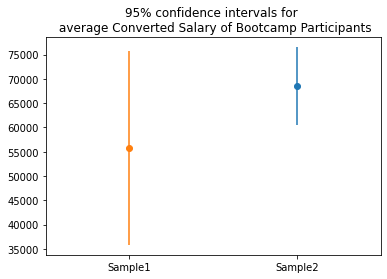

In [42]:
# plt.errorbar
import matplotlib.pyplot as plt


plt.errorbar(x=1, y=big_sample[1], yerr=(big_sample[2] - big_sample[1]), fmt='o')
plt.errorbar(x=0, y=small_sample[1], yerr=small_sample[2] - small_sample[1], fmt='o')
plt.title('95% confidence intervals for \n average Converted Salary of Bootcamp Participants')
plt.xticks(ticks=[0,1], labels=['Sample1', 'Sample2'])
plt.xlim(-.5, 1.5)
plt.show()

**2) Create a plot using `plt.bar` that compares both of the confidence intervals.**

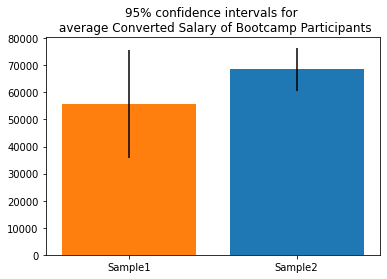

In [44]:
# plt.bar

plt.bar(x=1, height=big_sample[1], yerr=(big_sample[2] - big_sample[1]))
plt.bar(x=0, height=small_sample[1], yerr=small_sample[2] - small_sample[1])
plt.title('95% confidence intervals for \n average Converted Salary of Bootcamp Participants')
plt.xticks(ticks=[0,1], labels=['Sample1', 'Sample2'])
plt.xlim(-.5, 1.5)
plt.show()


## Part 4 - Check for Understanding







**Calculate a Confidence Interval using the entire dataset. How precise do our estimates get?**

In [0]:
bootcamps.head()

In [53]:
entire_df

(71299.82986224785, 73453.40420137631, 75606.97854050477)

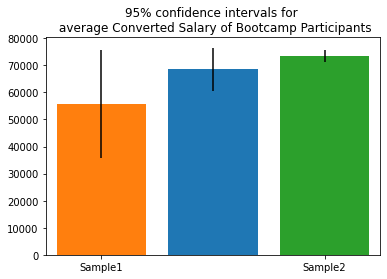

In [50]:
entire_df = CI(bootcamps['ConvertedSalary'])

plt.bar(x=1, height=big_sample[1], yerr=(big_sample[2] - big_sample[1]))
plt.bar(x=0, height=small_sample[1], yerr=small_sample[2] - small_sample[1])
plt.bar(x=2, height=entire_df[1], yerr=entire_df[2] - entire_df[1])
plt.title('95% confidence intervals for \n average Converted Salary of Bootcamp Participants')
plt.xticks(ticks=[0,2], labels=['Sample1', 'Sample2', 'Entire Survey'])
plt.xlim(-.5, 2.5)
plt.show()


Our estimates get more and more precise the larger the sample size gets. With the entire data set the precision increases marginally. we now are seeing the average salary within under 2k or eachother. That is much more like it than seeing estimates range 7k above or below what we calculated. 

**What does "precision" mean in the context of statistical estimates and how is that different from "accuracy?"**

Precision is the closeness to a certain means sample size. When you are comparing precision to accuracy in regards to the sample vs the popuation, when the margin or error decreases, we become more precise with our estimates. When the Mean value of the sample size gets closer to the mean value of the population, our accuracy increases. 

**It is very common to misunderstand what is captured by a 95% confidence interval. What is the correct interpretation? ([Hint](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/))**

With the 95% confidence interval we are capturing 95% of the possible means that could result from a certain sample size. Meaning within 95% of the means calculated it will have the estimate for the population mean


# Stretch Goals:

1) Study the relationship between t-tests and confidence intervals.
 - Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
 - Run a 1-sample t-test with the null hypothesis value being just barely **outside** of the confidence interval. What is the p-value?
 - Run a 1-sample t-test with the null hypothesis value being just barely **inside** of the confidence interval. What is the p-value?

  What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?


2) Go back to our [congressional voting dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph. 

3) Dive deeper into the [2018 Stack Overflow Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey) results to see what cool things you can find.

In [0]:
# import Data set for congressional issues
column_headers = ['party','handicapped-infants','water-project',
                  'budget','physician-fee-freeze', 'el-salvador-aid',
                  'religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration',
                  'synfuels', 'education', 'right-to-sue','crime','duty-free',
                  'south-africa']


df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', names=column_headers)

df.head()

In [0]:
df = df.replace({'y':1, 'n':0, '?':np.nan})

df.head()

In [58]:
dem = df[df['party'] == 'democrat']

dem.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [69]:
demclean = dem.dropna()

demclean.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
19,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
23,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
25,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
26,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [75]:
confidence_intervals_dem_issues = []

for column in column_headers:
  if column != 'party':
    print(column, CI(demclean[column]))

handicapped-infants (0.5008854514528094, 0.5887096774193549, 0.6765339033859004)
water-project (0.3627917755681809, 0.45161290322580644, 0.540434030883432)
budget (0.791966749899413, 0.8548387096774194, 0.9177106694554258)
physician-fee-freeze (0.01008836071171925, 0.04838709677419355, 0.08668583283666784)
el-salvador-aid (0.13000591391201893, 0.20161290322580644, 0.27321989253959394)
religious-groups (0.3548790007497182, 0.4435483870967742, 0.5322177734438303)
anti-satellite-ban (0.6905800506734978, 0.7661290322580645, 0.8416780138426312)
aid-to-contras (0.7637035637475735, 0.8306451612903226, 0.8975867588330717)
mx-missile (0.7176672431336555, 0.7903225806451613, 0.862977918156667)
immigration (0.44320399355877216, 0.532258064516129, 0.6213121354734858)
synfuels (0.41883613678222775, 0.5080645161290323, 0.5972928954758367)
education (0.06919940918552969, 0.12903225806451613, 0.18886510694350256)
right-to-sue (0.2093085202865504, 0.2903225806451613, 0.3713366410037722)
crime (0.261827

In [0]:
?stats.bayes_mvs